In [51]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


Running the dataset

In [52]:
df = pd.read_csv('heart.csv')

In [53]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Using Pandas Profiling to generate a basic report of the current dataframe.

We can access the report from output.html

In [55]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Attribute Information

1)age

2)sex

3)chest pain type (4 values)

4)resting blood pressure

5)serum cholestoral in mg/dl

6)fasting blood sugar > 120 mg/dl

7)resting electrocardiographic results (values 0,1,2)

8)maximum heart rate achieved

9)exercise induced angina

10)oldpeak = ST depression induced by exercise relative to rest

11)the slope of the peak exercise ST segment

12)number of major vessels (0-3) colored by flourosopy

13)thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Let's check NULL values

In [56]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

sex :- 1=male ; 0=female

fbs :- 1=true ; 0=false

exang :- 1=yes ; 0=no



In [57]:
df['sex'][df['sex']==1] = 'male'
df['sex'][df['sex']==0] = 'female'

<ipython-input-57-564e5e5df32c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex']==1] = 'male'


In [58]:
df['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

Let us create an age band 

In [59]:
df['ageband'] = pd.cut(df['age'], bins=[25,45,55,65,80], labels=["25-45", "46-55", "56-65", "66-80"])

In [60]:
df['ageband'].value_counts().sort_values(ascending=True)

66-80     33
25-45     64
46-55     88
56-65    118
Name: ageband, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    object  
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    int64   
 14  ageband   303 non-null    category
dtypes: category(1), float64(1), int64(12), object(1)
memory usage: 33.7+ KB


Let's convert 'chol' to numerical value

**From this website we can find the range of cholestrol levels**

 **https://www.healthline.com/health/high-cholesterol/levels-by-age#children**

    200>    :-  Good

    200-239  :- Moderate

    240<     :- High

In [62]:
df['cholband'] = pd.cut(df['chol'], bins=[0, 200, 239, 400], labels=['Good', 'Moderate', 'High'])

In [63]:
df['cholband'].value_counts()

High        151
Moderate     97
Good         51
Name: cholband, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    object  
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    int64   
 14  ageband   303 non-null    category
 15  cholband  299 non-null    category
dtypes: category(2), float64(1), int64(12), object(1)
memory usage: 34.1+ KB


In [65]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageband,cholband
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1,56-65,Moderate
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1,25-45,High
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1,25-45,Moderate
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1,56-65,Moderate
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1,56-65,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0,56-65,High
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0,25-45,High
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0,66-80,Good
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0,56-65,Good


Let's convert 'exang' to categorical value

In [66]:
df['exang'][df['exang']==0] = 'no'
df['exang'][df['exang']==1] = 'yes'

<ipython-input-66-c96c1babf6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exang'][df['exang']==0] = 'no'


Let's convert 'fbs' ie. **fasting blood sugar** to categorical values

In [67]:
df['fbs'][df['fbs']==0] = 'false'
df['fbs'][df['fbs']==1] = 'true'

<ipython-input-67-617acf5a9c7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fbs'][df['fbs']==0] = 'false'
<ipython-input-67-617acf5a9c7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fbs'][df['fbs']==1] = 'true'


Let's convert 'cp' to categorical values

We get this data from :-  http://archive.ics.uci.edu/ml/datasets/heart+Disease

 cp: chest pain type
 
    Value 1: typical angina

    Value 2: atypical angina

    Value 3: non-anginal pain

    Value 4: asymptomatic

In [68]:
df['cp'][df['cp']==0] = 'typical angina'
df['cp'][df['cp']==1] = 'atypical angina'
df['cp'][df['cp']==2] = 'non-anginal pain'
df['cp'][df['cp']==3] = 'asymptomatic'


<ipython-input-68-6e9ebbf0aee1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp'][df['cp']==0] = 'typical angina'


Converting 'slope' to categorical values

We get this info from :-  http://archive.ics.uci.edu/ml/datasets/heart+Disease

slope: the slope of the peak exercise ST segment

    Value 1: upsloping

    Value 2: flat
    
    Value 3: downsloping

In [69]:
df['slope'][df['slope']==0] = 'upsloping'
df['slope'][df['slope']==1] = 'flat'
df['slope'][df['slope']==2] = 'downsloping'

<ipython-input-69-cc14ec1dfdff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'][df['slope']==0] = 'upsloping'
<ipython-input-69-cc14ec1dfdff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'][df['slope']==1] = 'flat'
<ipython-input-69-cc14ec1dfdff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'][df['slope']==2] = 'downsloping'


In [70]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [71]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

**Converting 'restecg' to categorical variables**

restecg = resting electrocardiographic results

It is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.

0 = normal

1 = stt (having ST-T)

2 = hypertrophy

In [72]:
df['restecg'][df['restecg']==0] = 'normal'
df['restecg'][df['restecg']==1] = 'stt'
df['restecg'][df['restecg']==2] = 'hypertrophy'

<ipython-input-72-efdfa08167b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['restecg'][df['restecg']==0] = 'normal'


In [73]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    object  
 2   cp        303 non-null    object  
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    object  
 6   restecg   303 non-null    object  
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    object  
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    object  
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    int64   
 14  ageband   303 non-null    category
 15  cholband  299 non-null    category
dtypes: category(2), float64(1), int64(7), object(6)
memory usage: 34.1+ KB


Converting 'thal' to categorical variables.


1 = 'normal'

2 = 'fixed defect'

3 = 'reversable defect'

In [75]:
df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'

df['thal'][df['thal'] == 0] = 'normal'

<ipython-input-75-e4ac14a294c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thal'][df['thal'] == 1] = 'normal'


In [76]:
df.drop(['age', 'chol'], axis=1, inplace=True)

In [77]:
df

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageband,cholband
0,male,asymptomatic,145,true,normal,150,no,2.3,upsloping,0,normal,1,56-65,Moderate
1,male,non-anginal pain,130,false,stt,187,no,3.5,upsloping,0,fixed defect,1,25-45,High
2,female,atypical angina,130,false,normal,172,no,1.4,downsloping,0,fixed defect,1,25-45,Moderate
3,male,atypical angina,120,false,stt,178,no,0.8,downsloping,0,fixed defect,1,56-65,Moderate
4,female,typical angina,120,false,stt,163,yes,0.6,downsloping,0,fixed defect,1,56-65,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,female,typical angina,140,false,stt,123,yes,0.2,flat,0,reversable defect,0,56-65,High
299,male,asymptomatic,110,false,stt,132,no,1.2,flat,0,reversable defect,0,25-45,High
300,male,typical angina,144,true,stt,141,no,3.4,flat,2,reversable defect,0,66-80,Good
301,male,typical angina,130,false,stt,115,yes,1.2,flat,1,reversable defect,0,56-65,Good


# Exploratory Data Analysis

Finding correlations betweens columns using heatmap

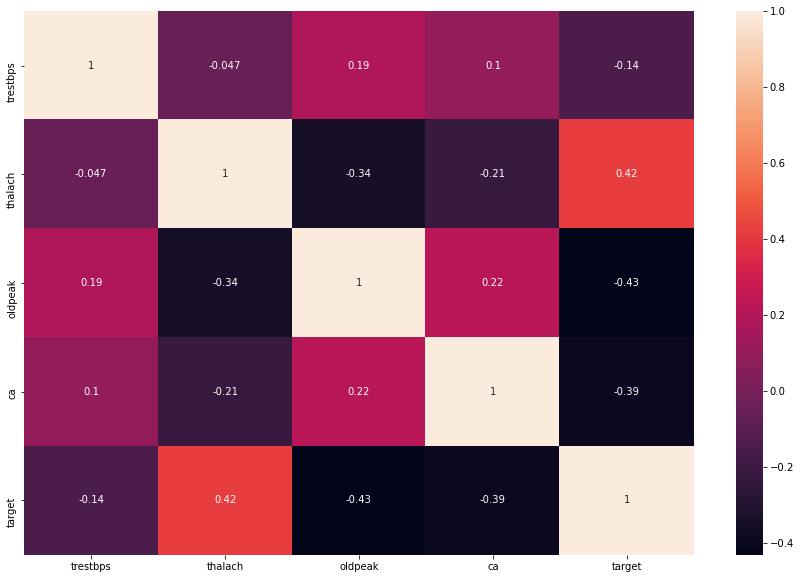

In [78]:
hearts = df.corr()

plt.figure(figsize=(15,10))

sns.heatmap(hearts, annot=True)

plt.show()

There is little to no correlation between the columns

In [79]:
df

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageband,cholband
0,male,asymptomatic,145,true,normal,150,no,2.3,upsloping,0,normal,1,56-65,Moderate
1,male,non-anginal pain,130,false,stt,187,no,3.5,upsloping,0,fixed defect,1,25-45,High
2,female,atypical angina,130,false,normal,172,no,1.4,downsloping,0,fixed defect,1,25-45,Moderate
3,male,atypical angina,120,false,stt,178,no,0.8,downsloping,0,fixed defect,1,56-65,Moderate
4,female,typical angina,120,false,stt,163,yes,0.6,downsloping,0,fixed defect,1,56-65,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,female,typical angina,140,false,stt,123,yes,0.2,flat,0,reversable defect,0,56-65,High
299,male,asymptomatic,110,false,stt,132,no,1.2,flat,0,reversable defect,0,25-45,High
300,male,typical angina,144,true,stt,141,no,3.4,flat,2,reversable defect,0,66-80,Good
301,male,typical angina,130,false,stt,115,yes,1.2,flat,1,reversable defect,0,56-65,Good


Let's find the number of **categorical variables** in the dataset

In [80]:
cols = df.columns

num_cols = df._get_numeric_data().columns

In [81]:
num_cols

Index(['trestbps', 'thalach', 'oldpeak', 'ca', 'target'], dtype='object')

In [82]:
cat_cols = list(set(cols) - set(num_cols))

The categorical columns are

In [83]:
cat_cols

['restecg',
 'exang',
 'sex',
 'fbs',
 'slope',
 'cholband',
 'thal',
 'ageband',
 'cp']

**sex, cp, exang, cholband, restecg, thal, ageband, slope, fbs**

Converting some of the categorical variables to objects

In [84]:
df['ageband'] = df['ageband'].astype('object')
df['cholband'] = df['cholband'].astype('object')
df['ca'] = df['ca'].astype('object')


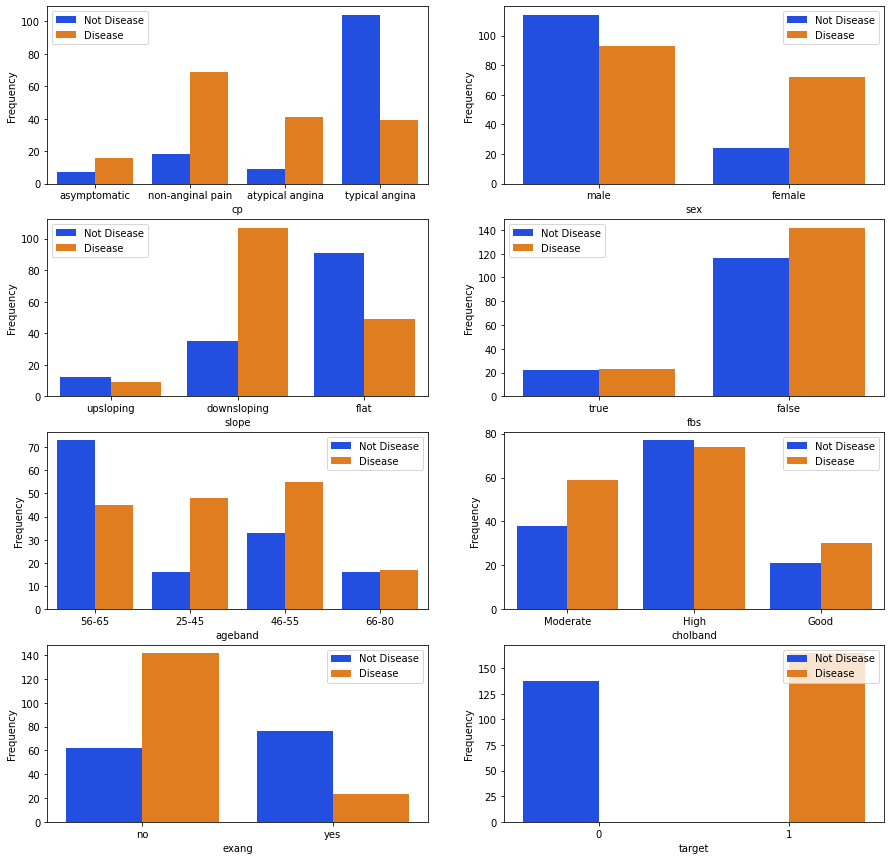

In [85]:
fig, axs = plt.subplots(4,2, figsize=(15,15))
xaxes = ['cp', 'sex', 'slope', 'fbs', 'ageband', 'cholband', 'exang', 'target']

for i, axiss in enumerate(axs.flat):
    sns.countplot(x= xaxes[i], hue='target', data=df, palette='bright', ax=axiss)
    axiss.set(ylabel='Frequency')
    axiss.legend(["Not Disease", "Disease"])
    

In [86]:
df

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageband,cholband
0,male,asymptomatic,145,true,normal,150,no,2.3,upsloping,0,normal,1,56-65,Moderate
1,male,non-anginal pain,130,false,stt,187,no,3.5,upsloping,0,fixed defect,1,25-45,High
2,female,atypical angina,130,false,normal,172,no,1.4,downsloping,0,fixed defect,1,25-45,Moderate
3,male,atypical angina,120,false,stt,178,no,0.8,downsloping,0,fixed defect,1,56-65,Moderate
4,female,typical angina,120,false,stt,163,yes,0.6,downsloping,0,fixed defect,1,56-65,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,female,typical angina,140,false,stt,123,yes,0.2,flat,0,reversable defect,0,56-65,High
299,male,asymptomatic,110,false,stt,132,no,1.2,flat,0,reversable defect,0,25-45,High
300,male,typical angina,144,true,stt,141,no,3.4,flat,2,reversable defect,0,66-80,Good
301,male,typical angina,130,false,stt,115,yes,1.2,flat,1,reversable defect,0,56-65,Good


In [87]:
num_cols

Index(['trestbps', 'thalach', 'oldpeak', 'ca', 'target'], dtype='object')

In [88]:
cat_cols

['restecg',
 'exang',
 'sex',
 'fbs',
 'slope',
 'cholband',
 'thal',
 'ageband',
 'cp']

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    object 
 1   cp        303 non-null    object 
 2   trestbps  303 non-null    int64  
 3   fbs       303 non-null    object 
 4   restecg   303 non-null    object 
 5   thalach   303 non-null    int64  
 6   exang     303 non-null    object 
 7   oldpeak   303 non-null    float64
 8   slope     303 non-null    object 
 9   ca        303 non-null    object 
 10  thal      303 non-null    object 
 11  target    303 non-null    int64  
 12  ageband   303 non-null    object 
 13  cholband  299 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 33.3+ KB


In [90]:
cat_cols

['restecg',
 'exang',
 'sex',
 'fbs',
 'slope',
 'cholband',
 'thal',
 'ageband',
 'cp']

In [91]:
new_cat = df[['thal', 'sex', 'fbs', 'slope', 'restecg', 'ca', 'exang','cp', 'ageband', 'cholband']].copy()

In [92]:
new_cat


,thal,sex,fbs,slope,restecg,ca,exang,cp,ageband,cholband
0,normal,male,true,upsloping,normal,0,no,asymptomatic,56-65,Moderate
1,fixed defect,male,false,upsloping,stt,0,no,non-anginal pain,25-45,High
2,fixed defect,female,false,downsloping,normal,0,no,atypical angina,25-45,Moderate
3,fixed defect,male,false,downsloping,stt,0,no,atypical angina,56-65,Moderate
4,fixed defect,female,false,downsloping,stt,0,yes,typical angina,56-65,High
...,...,...,...,...,...,...,...,...,...,...
298,reversable defect,female,false,flat,stt,0,yes,typical angina,56-65,High
299,reversable defect,male,false,flat,stt,0,no,asymptomatic,25-45,High
300,reversable defect,male,true,flat,stt,2,no,typical angina,66-80,Good
301,reversable defect,male,false,flat,stt,1,yes,typical angina,56-65,Good


In [93]:
new_cat_cols = new_cat.columns

In [94]:
new_cat_cols

Index(['thal', 'sex', 'fbs', 'slope', 'restecg', 'ca', 'exang', 'cp',
       'ageband', 'cholband'],
      dtype='object')

# One Hot Encoding Method

One Hot Encoding allows the representation of categorical data to be more expressive.

We will be converting **'new_cat_cols'** to one hot encoded columns

We will be using **'get_dummies'** to encode multiple columns.

In [95]:
df1 = pd.get_dummies(df, columns=new_cat_cols)

In [96]:
df1

,trestbps,thalach,oldpeak,target,thal_fixed defect,thal_normal,thal_reversable defect,sex_female,sex_male,fbs_false,...,cp_atypical angina,cp_non-anginal pain,cp_typical angina,ageband_25-45,ageband_46-55,ageband_56-65,ageband_66-80,cholband_Good,cholband_High,cholband_Moderate
0,145,150,2.3,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,130,187,3.5,1,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2,130,172,1.4,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,120,178,0.8,1,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
4,120,163,0.6,1,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,140,123,0.2,0,0,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
299,110,132,1.2,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
300,144,141,3.4,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
301,130,115,1.2,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [97]:
df

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageband,cholband
0,male,asymptomatic,145,true,normal,150,no,2.3,upsloping,0,normal,1,56-65,Moderate
1,male,non-anginal pain,130,false,stt,187,no,3.5,upsloping,0,fixed defect,1,25-45,High
2,female,atypical angina,130,false,normal,172,no,1.4,downsloping,0,fixed defect,1,25-45,Moderate
3,male,atypical angina,120,false,stt,178,no,0.8,downsloping,0,fixed defect,1,56-65,Moderate
4,female,typical angina,120,false,stt,163,yes,0.6,downsloping,0,fixed defect,1,56-65,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,female,typical angina,140,false,stt,123,yes,0.2,flat,0,reversable defect,0,56-65,High
299,male,asymptomatic,110,false,stt,132,no,1.2,flat,0,reversable defect,0,25-45,High
300,male,typical angina,144,true,stt,141,no,3.4,flat,2,reversable defect,0,66-80,Good
301,male,typical angina,130,false,stt,115,yes,1.2,flat,1,reversable defect,0,56-65,Good


# Creating The Models

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge

In [99]:
X = df1.drop('target', axis=1)
y = df1["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [100]:
#MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf1 = SVC(C=17).fit(X_train_scaled, y_train)

print('Training Set Accuracy: {:.2f}'.format(clf1.score(X_train_scaled, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf1.score(X_test_scaled, y_test)))


NameError: name 'SVC' is not defined

In [ ]:
#DecisionTree

clf2 = DecisionTreeClassifier(max_depth=10, random_state=2).fit(X_train, y_train)

print('Training Set Accuracy: {:.2f}'.format(clf2.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf2.score(X_test, y_test)))


In [ ]:
#GaussianNaiveBayes

nbdf = GaussianNB().fit(X_train, y_train)
print('Training Set Accuracy: {:.2f}'.format(nbdf.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(nbdf.score(X_test, y_test)))


In [ ]:
#RandomForest

clf3 = RandomForestClassifier(max_features=6, random_state=4)
clf3.fit(X_train, y_train)

test_pred_clf3 = clf3.predict(X_test)

print('Training Set Accuracy: {:.2f}'.format(clf3.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf3.score(X_test, y_test)))


In [ ]:
#GradientBoostingClassifier

clf4 = GradientBoostingClassifier(learning_rate=0.26, max_depth=8, random_state=20, max_features = 'log2',
                                  min_samples_leaf = 15, min_samples_split = 49)
clf4.fit(X_train, y_train)

y_predict_clf4 = clf4.predict(X_test)

print('Training Set Accuracy: {:.2f}'.format(clf4.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf4.score(X_test, y_test)))


In [ ]:
#RidgeRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.fit_transform(X_test)

linridge = Ridge(alpha=18).fit(X_train_scaled, y_train)

print('Training Set Accuracy: {:.2f}'.format(linridge.score(X_train_scaled, y_train)))

print('Test Set Accuracy: {:.2f}'.format(linridge.score(X_test_scaled, y_test)))

In [ ]:
#LinearSVC
from sklearn.svm import LinearSVC

clf5 = LinearSVC(C=4, random_state=2)
clf5.fit(X_train, y_train)

print('Training Set Accuracy: {:.2f}'.format(clf5.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf5.score(X_test, y_test)))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf6 = SVC(kernel='rbf')
grid_values = {'gamma' : [0.001, 0.01,0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf6, param_grid= grid_values)
grid_clf_acc.fit(X_train, y_train)

y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)


print('Grid past param(max acc) ', grid_clf_acc.best_params_)
print('Grid past param(max score) ', grid_clf_acc.best_score_)


In [ ]:
grid_clf_auc = GridSearchCV(clf6, param_grid= grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)

y_decision_fn_scores_auc = grid_clf_acc.decision_function(X_test)

print('Test set AUC ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid past param(max AUC acc) ', grid_clf_acc.best_params_)
print('Grid past param(max AUC score) ', grid_clf_acc.best_score_)


In [101]:
df

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageband,cholband
0,male,asymptomatic,145,true,normal,150,no,2.3,upsloping,0,normal,1,56-65,Moderate
1,male,non-anginal pain,130,false,stt,187,no,3.5,upsloping,0,fixed defect,1,25-45,High
2,female,atypical angina,130,false,normal,172,no,1.4,downsloping,0,fixed defect,1,25-45,Moderate
3,male,atypical angina,120,false,stt,178,no,0.8,downsloping,0,fixed defect,1,56-65,Moderate
4,female,typical angina,120,false,stt,163,yes,0.6,downsloping,0,fixed defect,1,56-65,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,female,typical angina,140,false,stt,123,yes,0.2,flat,0,reversable defect,0,56-65,High
299,male,asymptomatic,110,false,stt,132,no,1.2,flat,0,reversable defect,0,25-45,High
300,male,typical angina,144,true,stt,141,no,3.4,flat,2,reversable defect,0,66-80,Good
301,male,typical angina,130,false,stt,115,yes,1.2,flat,1,reversable defect,0,56-65,Good


In [ ]:
df.to_csv('heart_disease_cleaned.csv